<a href="https://colab.research.google.com/github/satyam-jyoti-sankar/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour(y)
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ capstone2/SeoulBikeData.csv',encoding = 'ISO-8859-1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Show no of columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# it sum no of missing valu in our data
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Here we found no missing data is present.

# Preprocess data

In [ ]:
# Here we just rename our columns as for suitable
df = df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       })
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# search no of duplicate row
print('No of duplicate row in the dataset is:',df.duplicated().sum())

No of duplicate row in the dataset is: 0


In [ ]:
# Only for numarical coloum
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Numarical dataset
df1=df[df.describe().columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


As we seen in before Date is object type so we convert it to date tym format sothat we can do differce calulation from this.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


If i conclude directly date it is uniqe no alwas so it affect our data during prediction also no proper EDA evaluatation so we devided into year,date,and month then drop our original date coloum.

In [ ]:
df.drop(columns=['Date'],axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Day 

In [ ]:
x=['Seasons','Holiday','Functioning Day']
y={}
for i in x:
  y[i]=df[i].unique()
y
# as for our reqarment we can convert those catagorycal variable to binary format as for calculatation


 

{'Functioning Day': array(['Yes', 'No'], dtype=object),
 'Holiday': array(['No Holiday', 'Holiday'], dtype=object),
 'Seasons': array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)}

# EDA

## Comparison between Book on Holiday and normal day

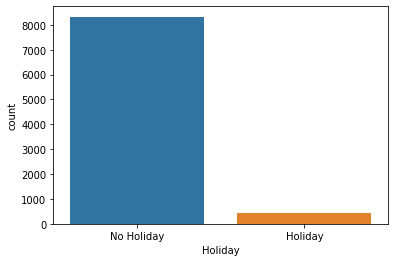

In [ ]:
sns.countplot(df['Holiday'])

## Count no of rented bike as for holiday and normal day.

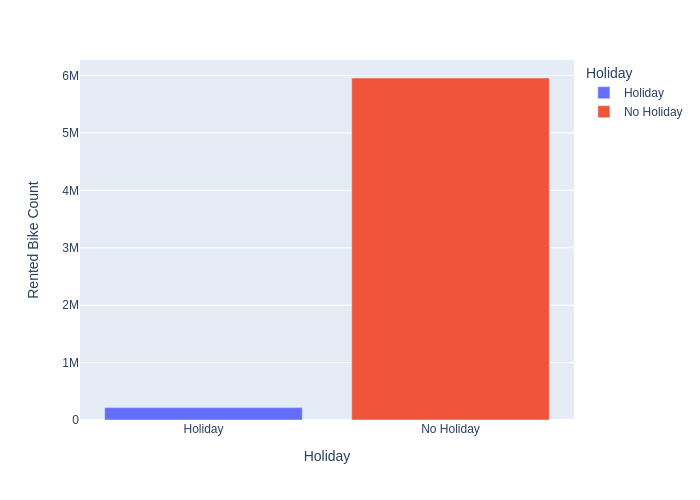

In [ ]:
import plotly.express as px
Holiday = df.groupby("Holiday")['Rented Bike Count'].sum().reset_index()
fig = px.bar(Holiday, x='Holiday', y='Rented Bike Count',color='Holiday')
#fig.show()
fig.show(renderer="png")

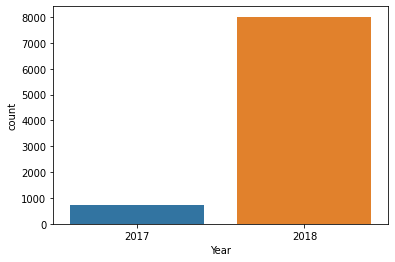

In [ ]:
sns.countplot(x="Year", data=df)

Here we se that in compare to 2017,2018 rental bike usegs is so high

## Cout no of rented bike monthly wise

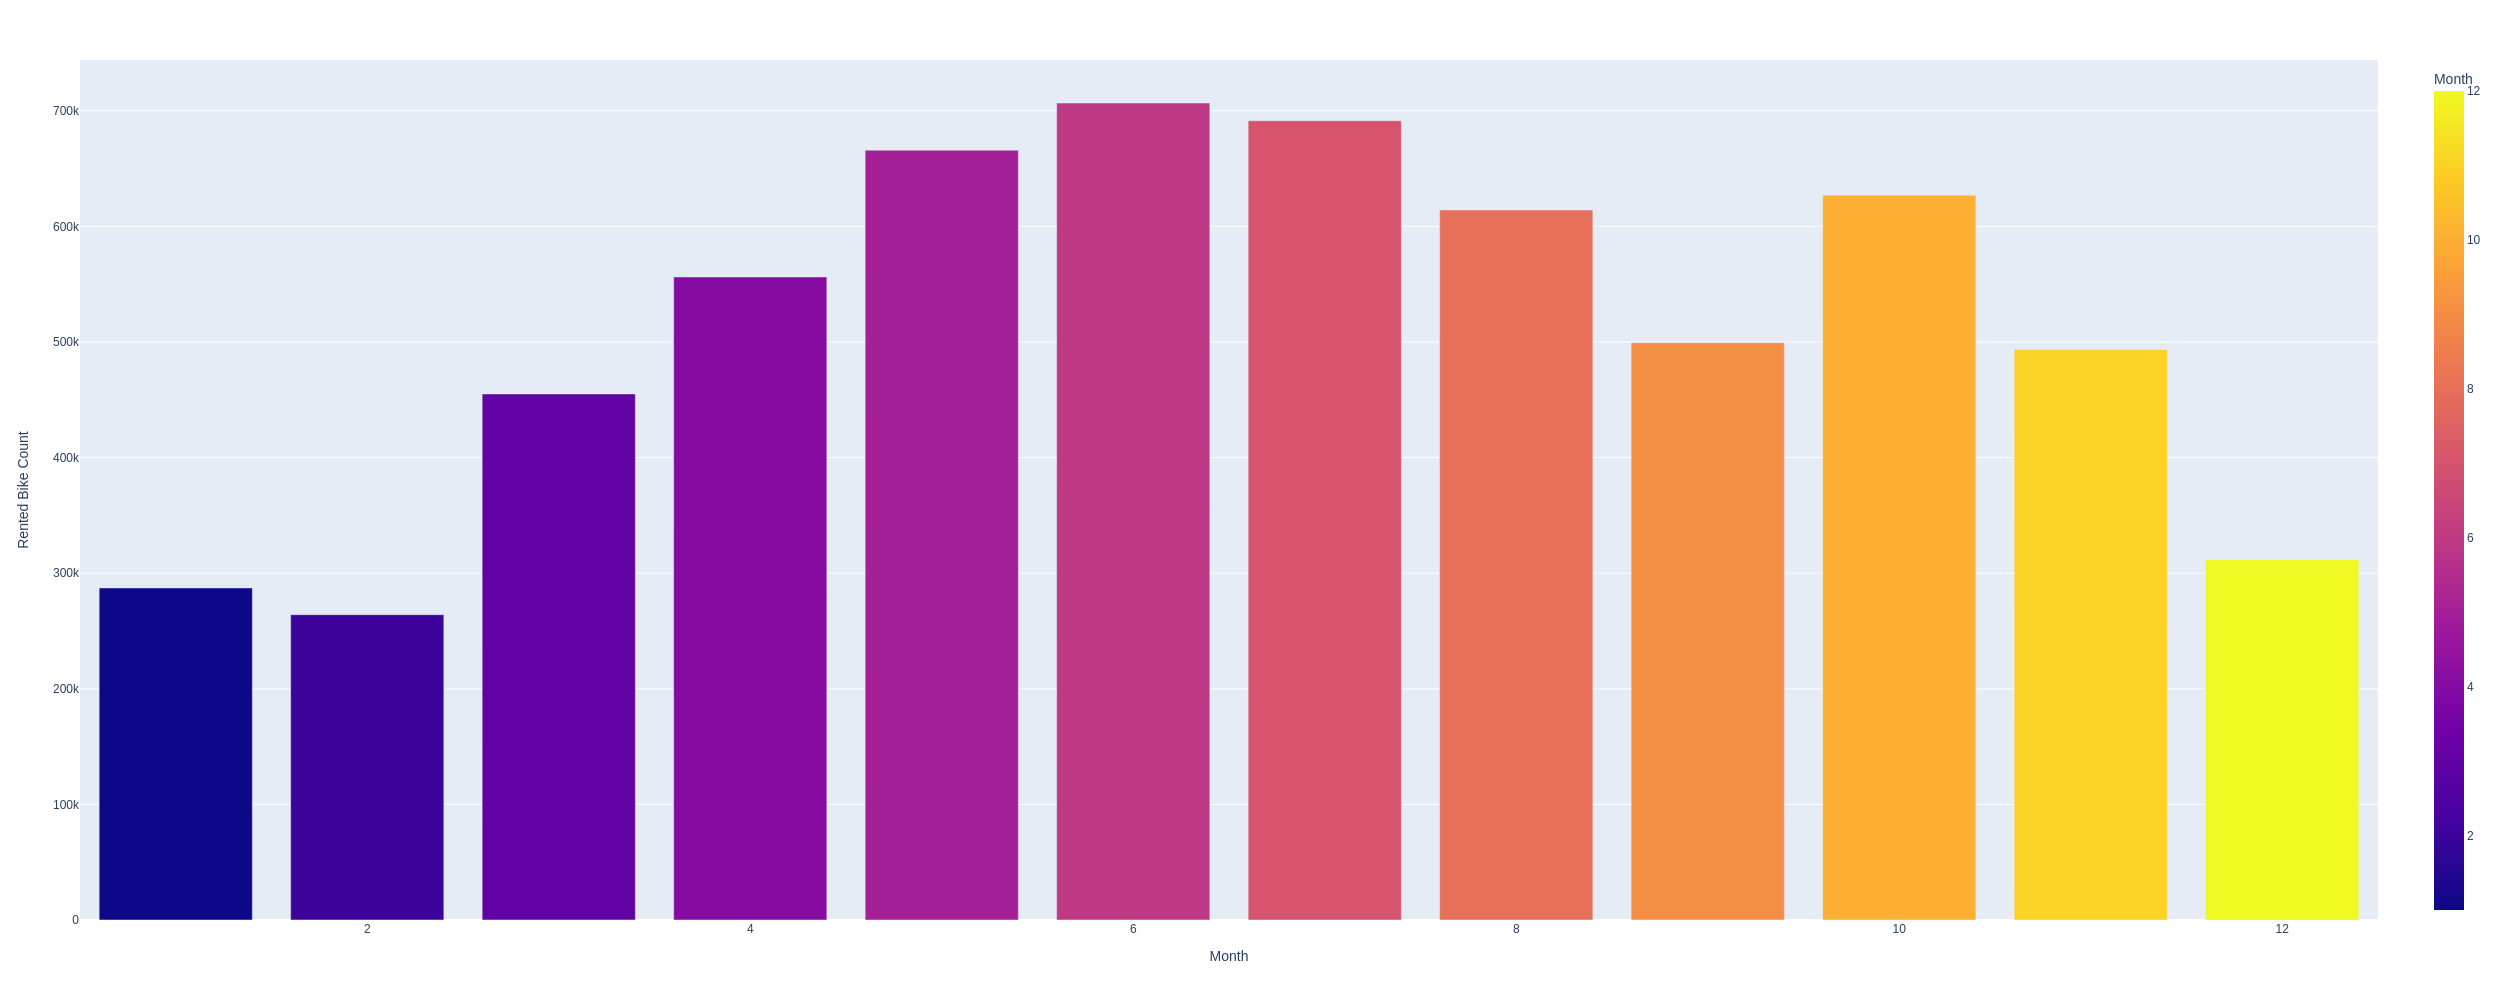

In [ ]:
Month = df.groupby("Month")['Rented Bike Count'].sum().reset_index()
 
fig = px.bar(Month, x='Month', y='Rented Bike Count',color = 'Month',
              height=400)
# fig.show()
fig.show(renderer="png",width=2500, height=1000)

## Day wise rental book of bike

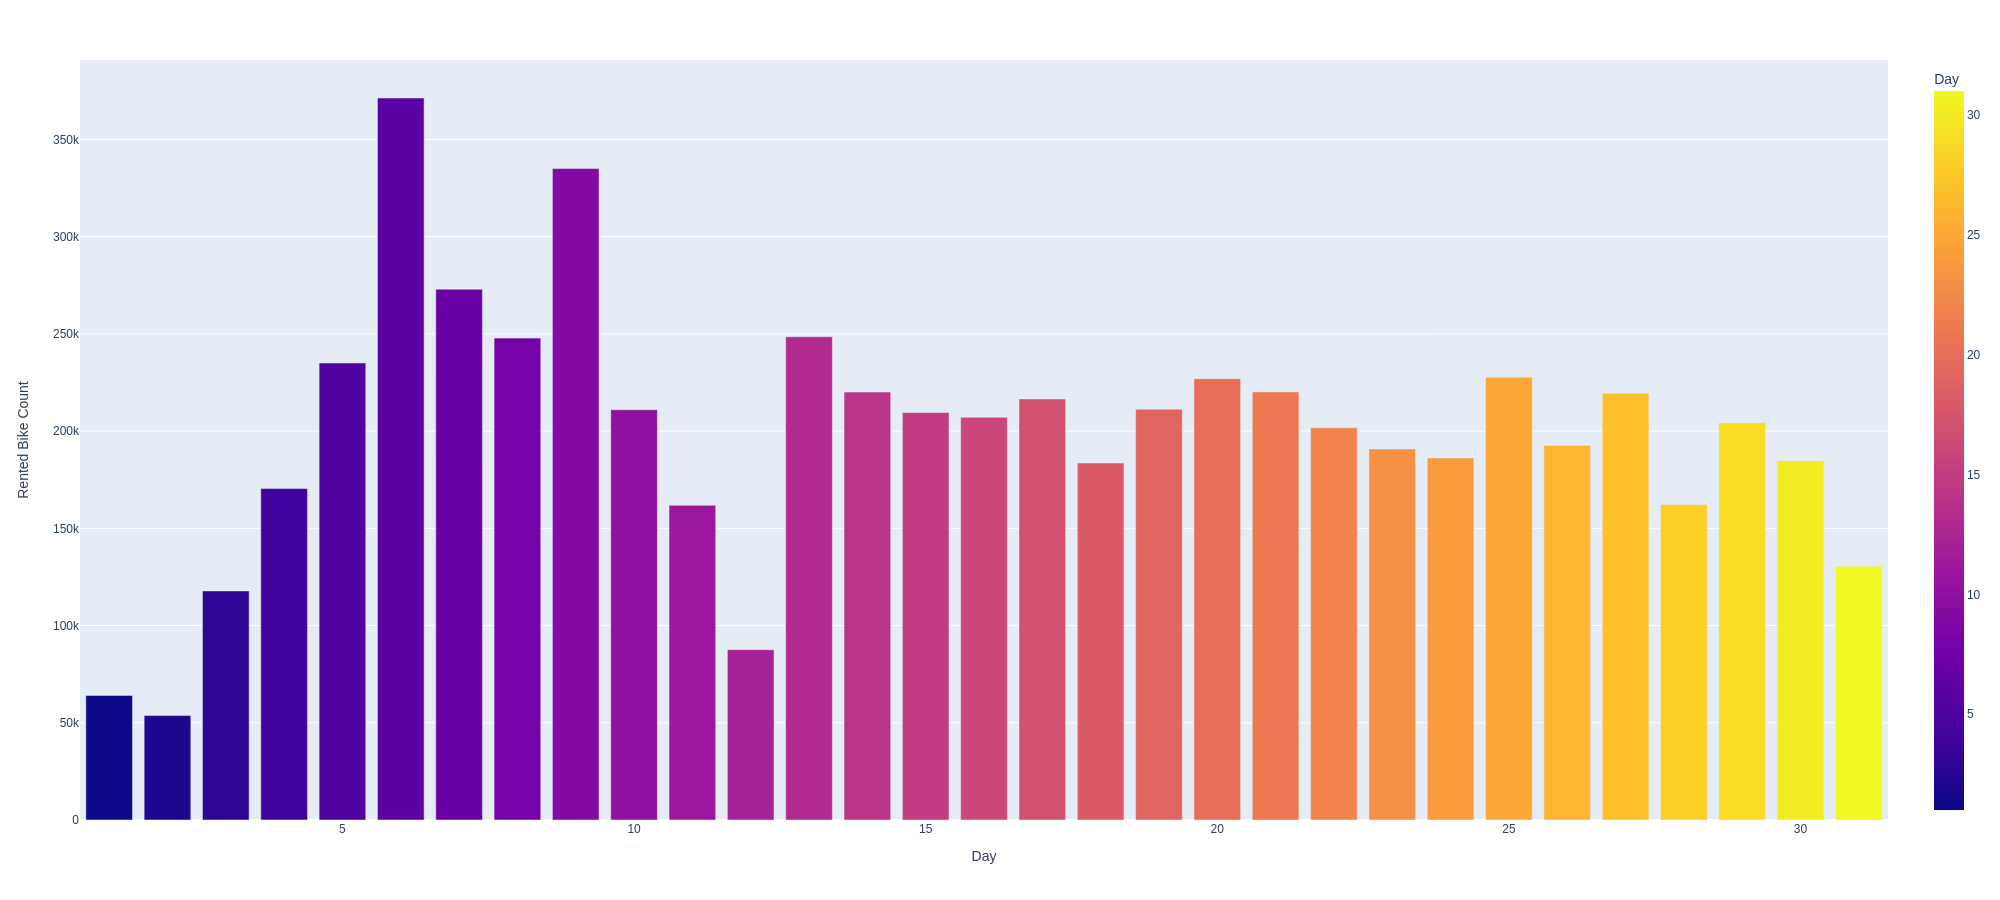

In [ ]:
Day =df.groupby("Day").sum().reset_index()
fig = px.bar(Day, x='Day', y='Rented Bike Count',color = 'Day',
              height=400)
# fig.show()
fig.show(renderer="png",width=2000, height=900)

## How many total rental of bike as for each seasons

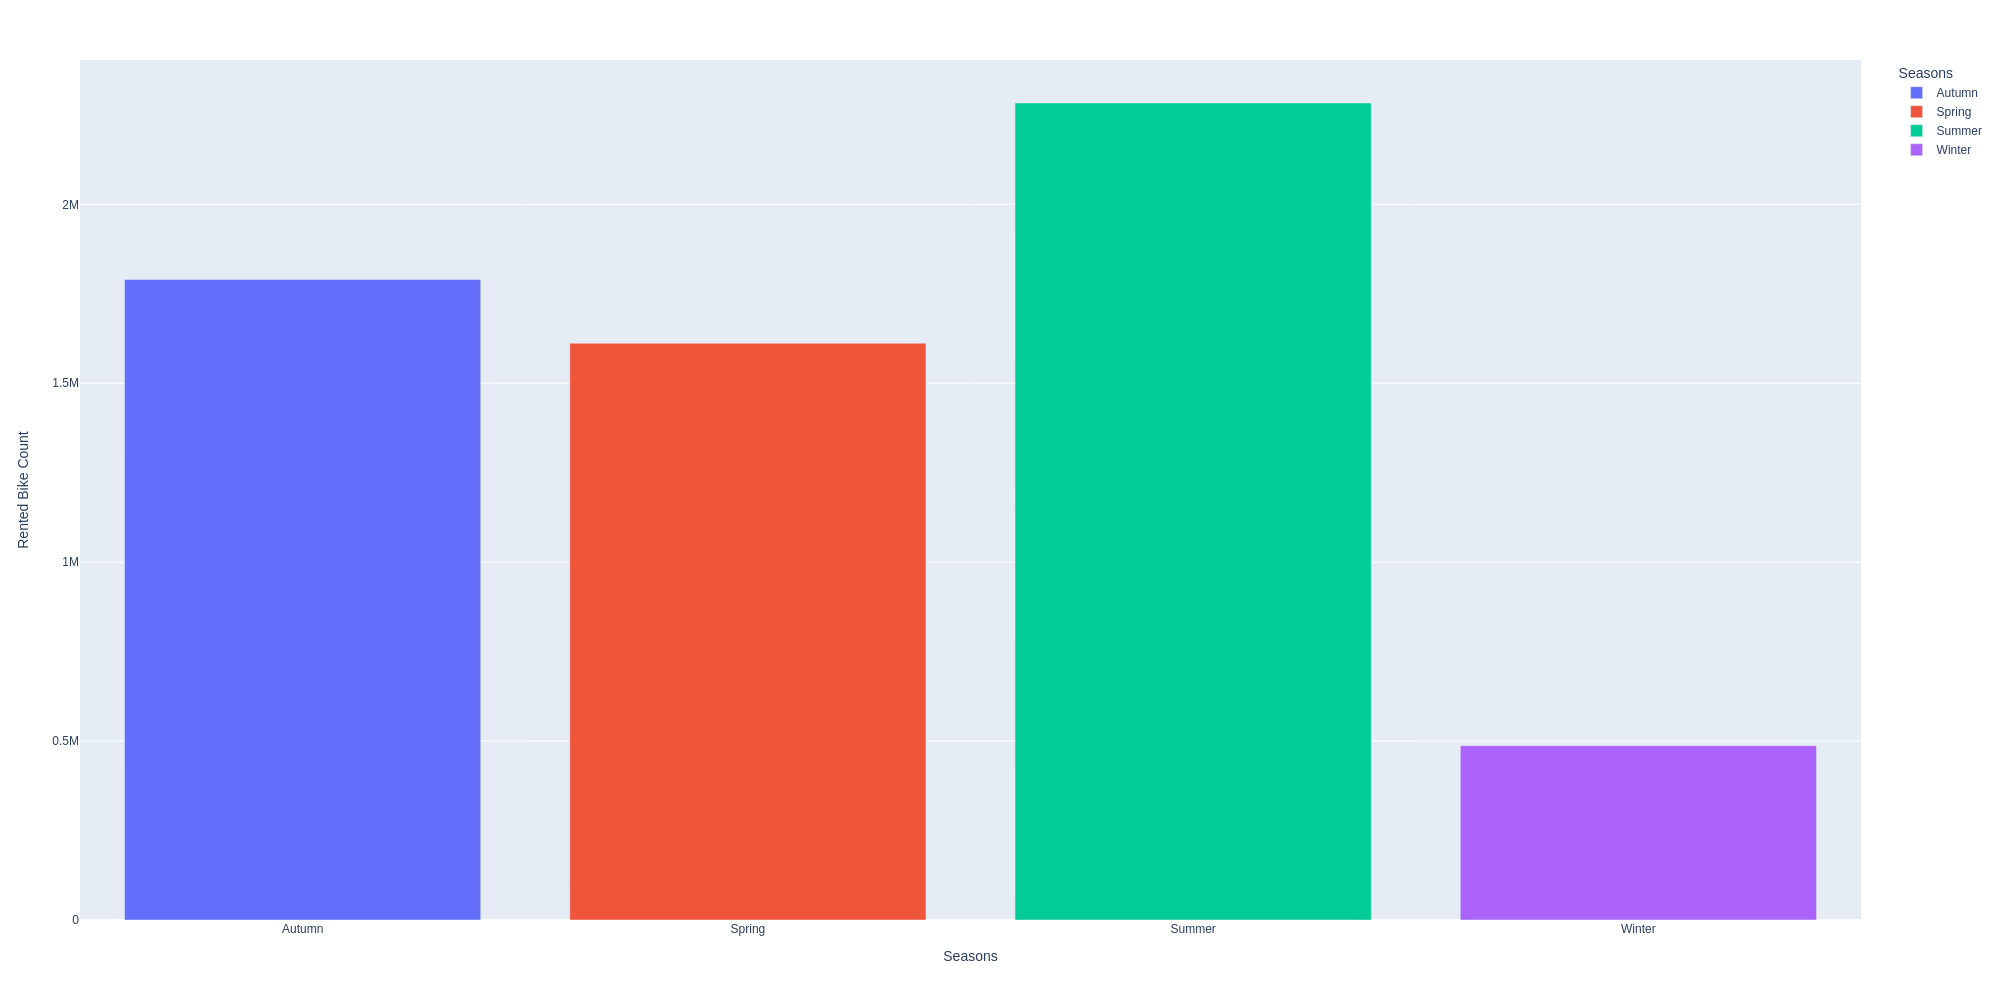

In [ ]:
seasons= df.groupby('Seasons').sum().reset_index()
fig = px.bar(seasons, x='Seasons', y='Rented Bike Count',color = 'Seasons',height=400)
# fig.show()
fig.show(renderer="png",width=2000, height=1000)

## Book bike for no of hour as for seasons,Holiday and functioning day 

In [ ]:
x=[]
for i in list(df.columns):
  if i not in df[df.describe().columns]:
    x.append(i)
x

['Seasons', 'Holiday', 'Functioning Day']

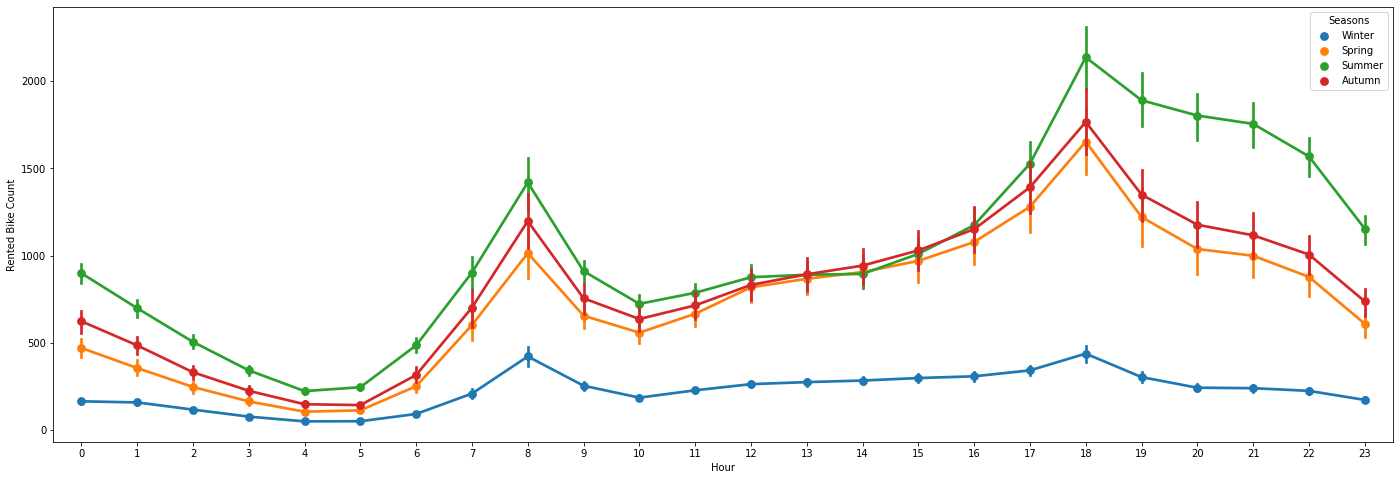

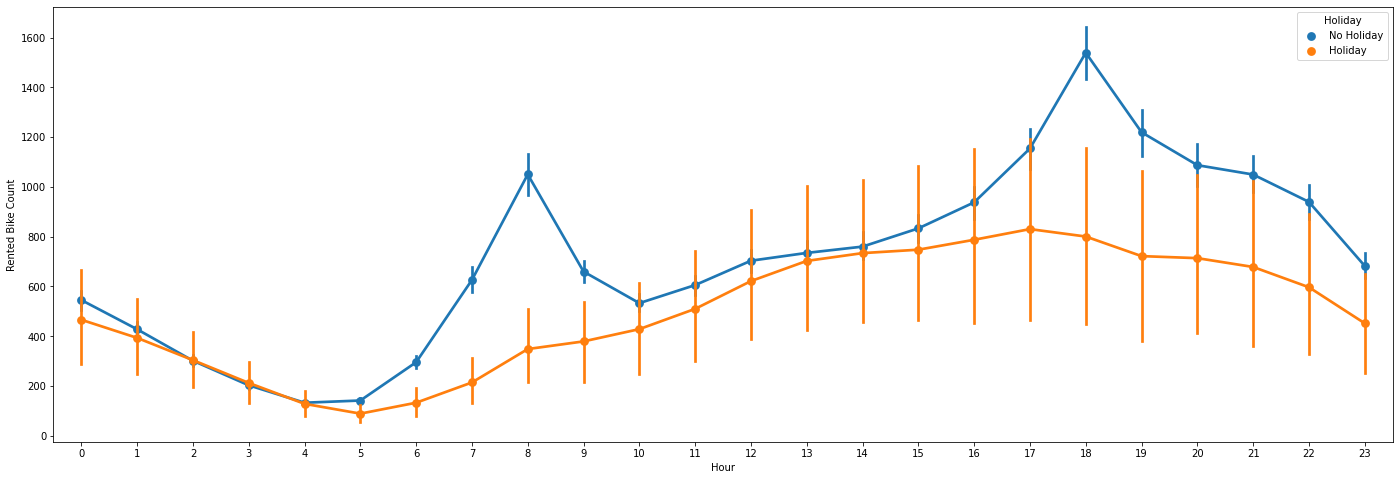

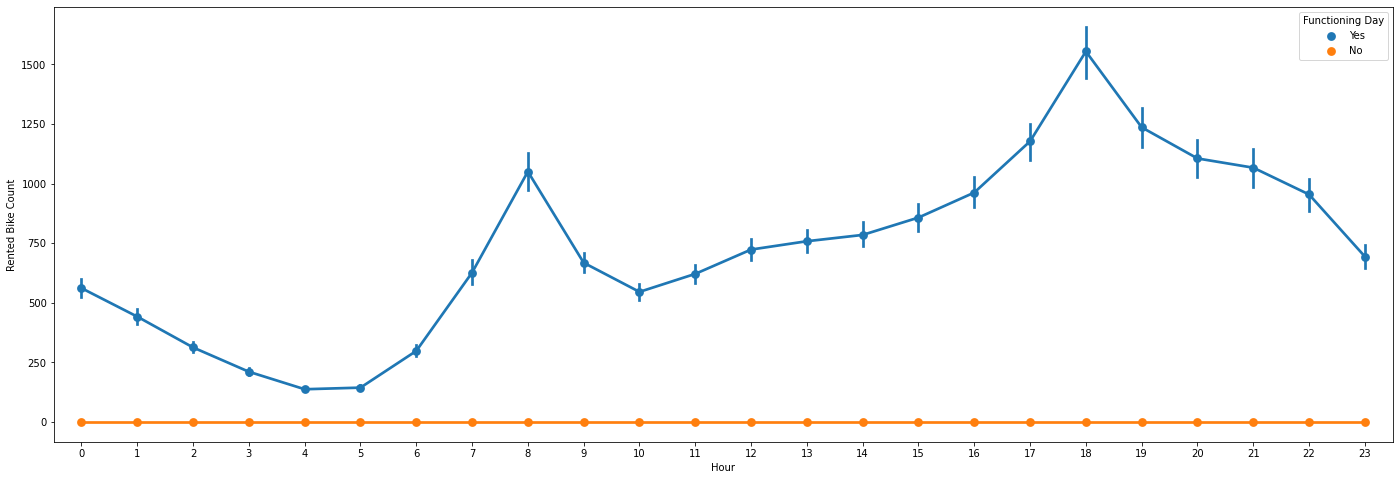

In [ ]:
#x=[ 'Holiday','Seasons','Functioning Day']
for i in x:
     
    plt.figure(figsize=(24,8))
    sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=i)
 

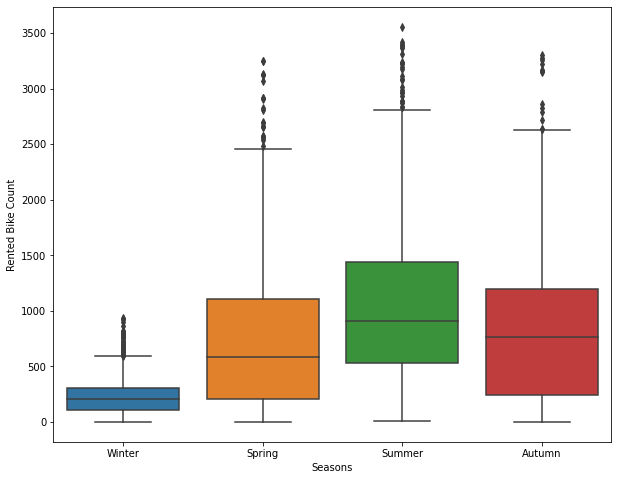

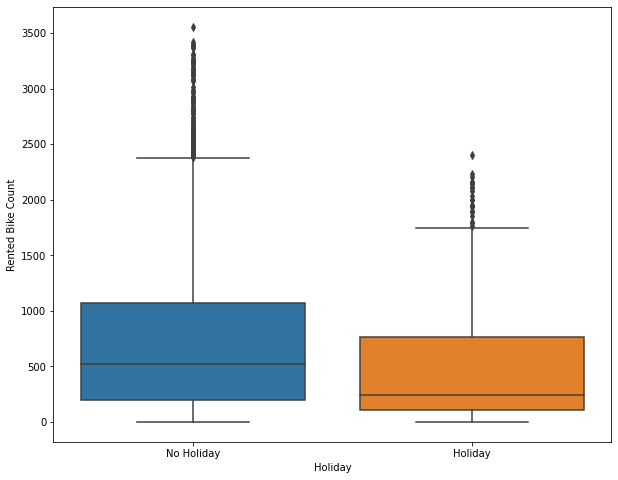

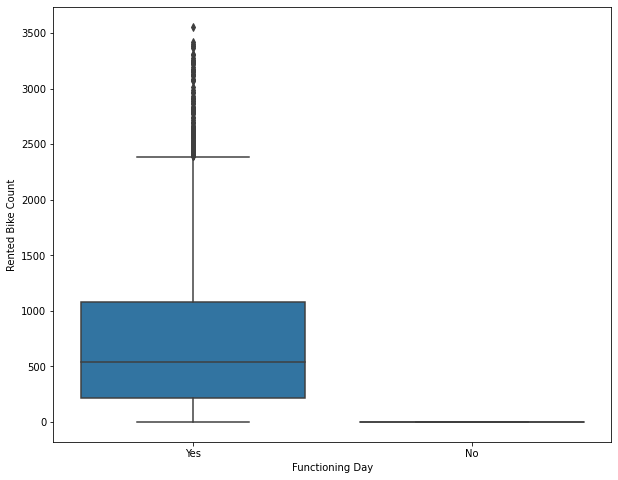

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in x:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

## Regplot shoow  corelation between our bike rent with all other factor.

In [ ]:
x=list(df1.columns)
len(x)

10

## Regplot shoow  corelation between our bike rent with all other factor.

In [ ]:
x=list(df1.columns)
len(x)

10

[Text(0.5, 1.0, 'Relation between Snowfall  and Rented Bike Count')]

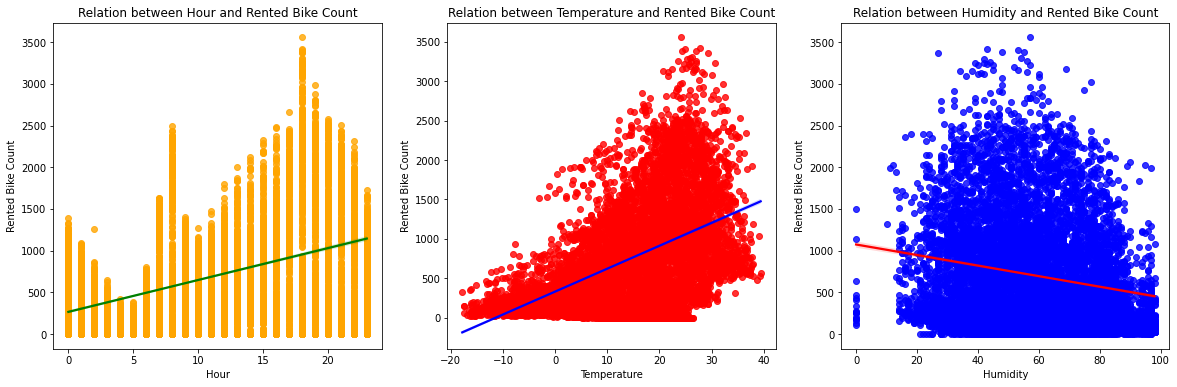

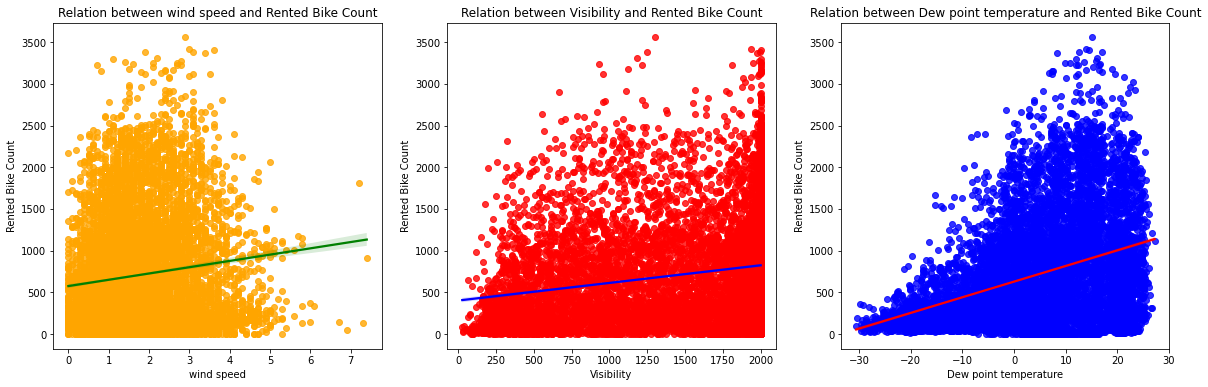

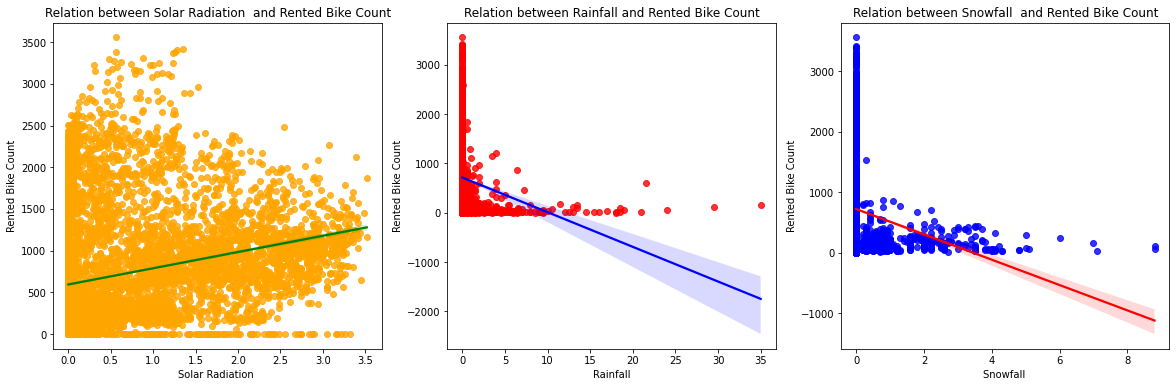

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[1]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[1]} and Rented Bike Count")
sns.regplot(x=df[x[2]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[2]} and Rented Bike Count")
sns.regplot(x=df[x[3]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[3]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[4]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[4]} and Rented Bike Count")
sns.regplot(x=df[x[5]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[5]} and Rented Bike Count")
sns.regplot(x=df[x[6]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[6]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[7]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[7]} and Rented Bike Count")
sns.regplot(x=df[x[8]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[8]} and Rented Bike Count")
sns.regplot(x=df[x[9]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[9]} and Rented Bike Count")
 

# coorelation Matrix

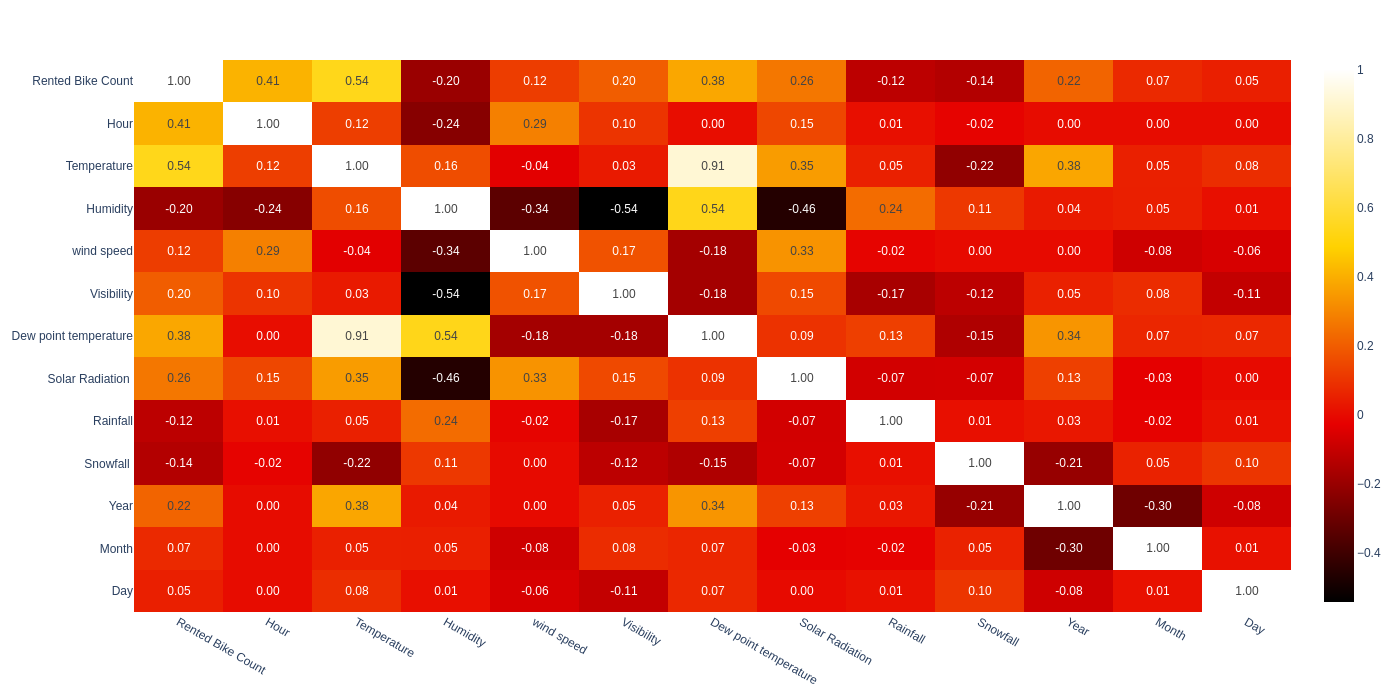

In [ ]:
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1400, height=700) 

From the above corelatation graph we se that there are 
>Highly Multi colinarity between tempture and dew point tempture.(0.91)
so we can add make them a single temp coloum
>in 2nd we se that the day and month are very less corilation with rented bike (0.07) ..so we drop it


In [ ]:
### removing multicollear
df['Total_temp'] = 0.7*df['Temperature'] + 0.4*df['Dew point temperature']
df=df.drop(['Temperature','Dew point temperature'],axis=1)

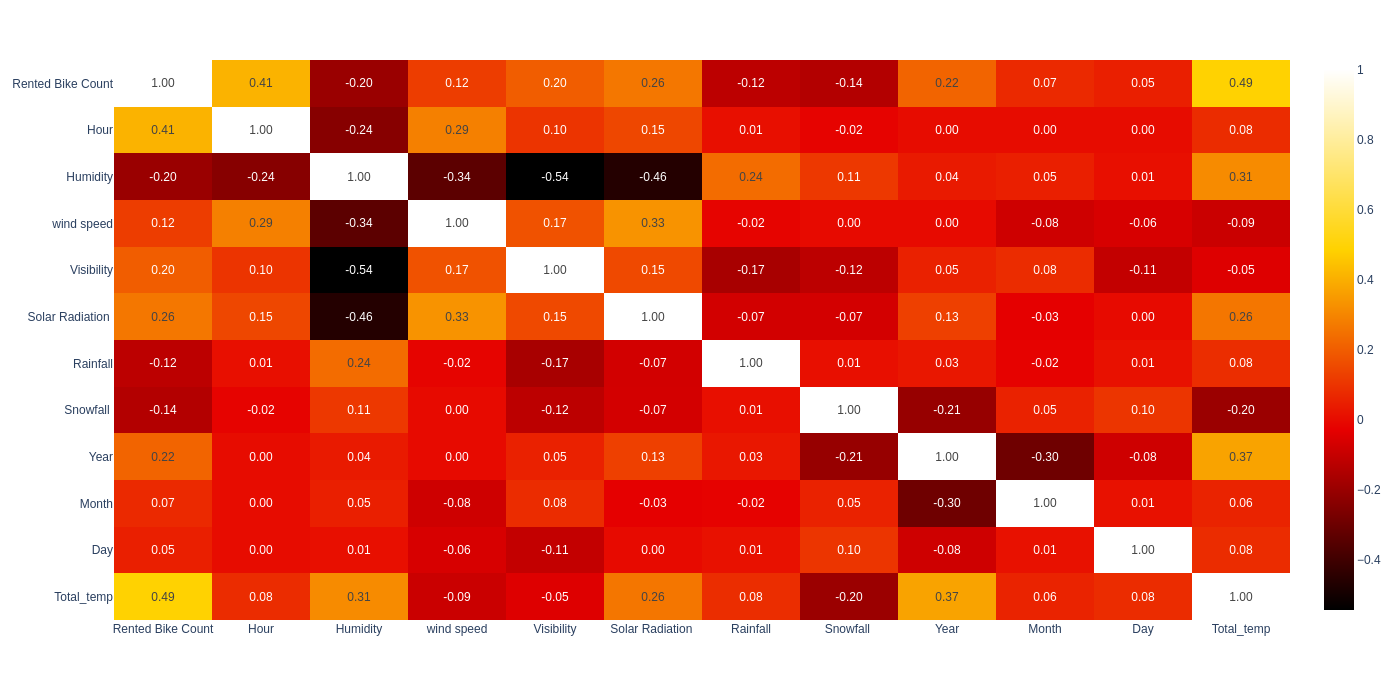

In [ ]:
#after remove Multicollinearity
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
fig.show(renderer="png",width=1400, height=700) 

skewness is:- 1.1532306631480034


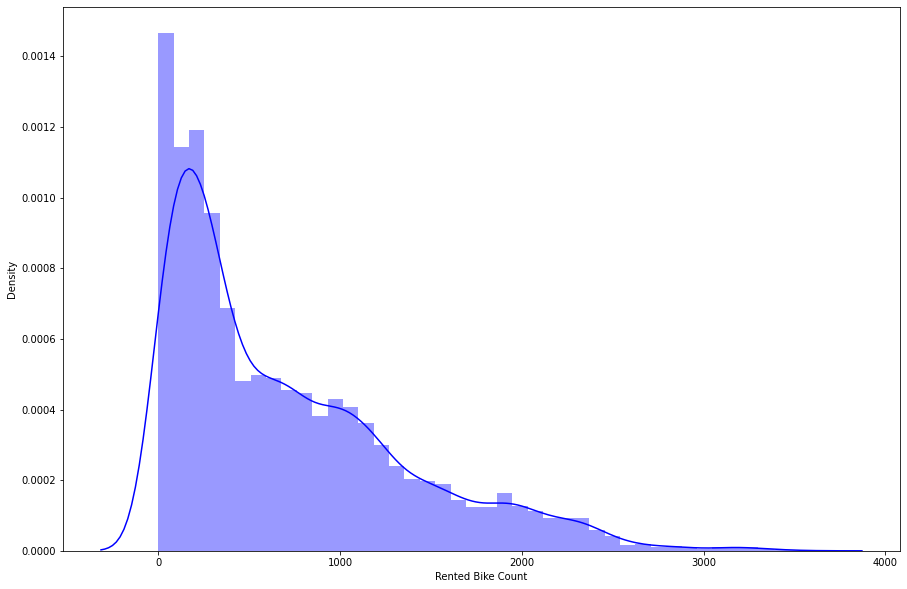

In [ ]:
# Dependent variable 'Price'
from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(df['Rented Bike Count'],color="b")
print('skewness is:-',skew(df['Rented Bike Count']))

Here our dependent variable Rented Bike Cout is highly Posetively skewed


skwness is:- 0.23732144485836718


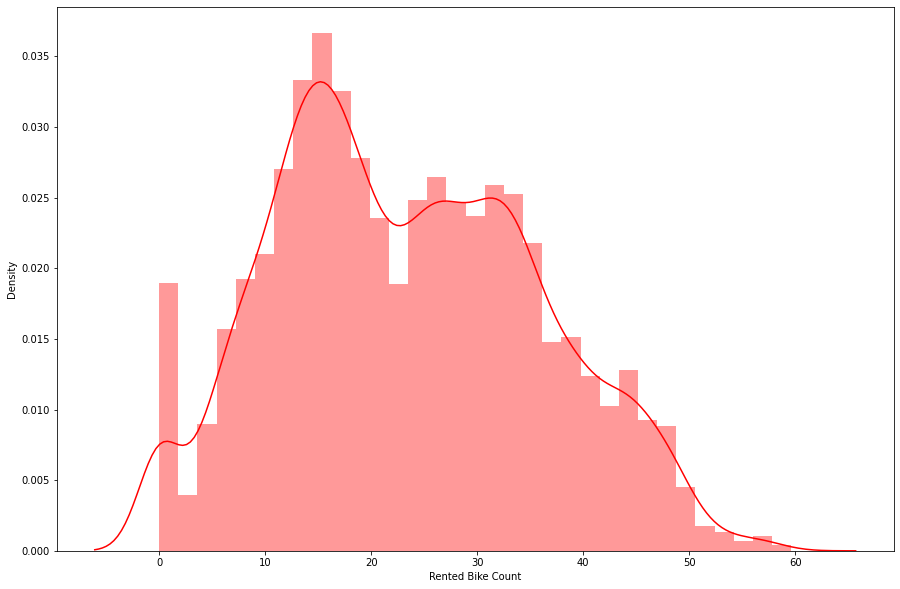

In [ ]:
# from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="r")
# x=1
print('skwness is:-',skew(np.sqrt(df['Rented Bike Count'])))

# Data encoding

In [ ]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Humidity', 'wind speed', 'Visibility',
       'Solar Radiation ', 'Rainfall', 'Snowfall ', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Total_temp'],
      dtype='object')

In [ ]:
# convert object type data to dumy variables(binary form)
data=df.copy()
x=['Seasons','Holiday','Functioning Day','Month','Hour']
for i in x:
      data = pd.concat([data, pd.get_dummies(data[i], prefix=i, drop_first=True)], axis=1)
      data = data.drop([i], axis=1)
data.drop(['Year','Day'],axis=1)
data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Humidity             8760 non-null   int64  
 2   wind speed           8760 non-null   float64
 3   Visibility           8760 non-null   int64  
 4   Solar Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Year                 8760 non-null   int64  
 8   Day                  8760 non-null   int64  
 9   Total_temp           8760 non-null   float64
 10  Seasons_Spring       8760 non-null   uint8  
 11  Seasons_Summer       8760 non-null   uint8  
 12  Seasons_Winter       8760 non-null   uint8  
 13  Holiday_No Holiday   8760 non-null   uint8  
 14  Functioning Day_Yes  8760 non-null   uint8  
 15  Month_2              8760 non-null   u

In [ ]:
#Assign the value in X and Y
x = data.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(data['Rented Bike Count'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=77)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6570, 48) (6570,)
(2190, 48) (2190,)


# Aplly ML

## Linier regraration

In [ ]:
train={}
test={}

In [ ]:
# linier regratation
reg= LinearRegression().fit(x_train, y_train)

In [ ]:
reg.score(x_train, y_train)

0.7629334199581261

In [ ]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [ ]:
# metrics for linier regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) 

MSE : 37.13314681383164
RMSE : 6.093697302445506
R2 : 0.7629334199581261
Adjusted R2 : 0.7576185223205689


In [ ]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.273629840755824
RMSE : 6.1052133329438885
R2 : 0.750827145595724
Adjusted R2 : 0.745240832185446


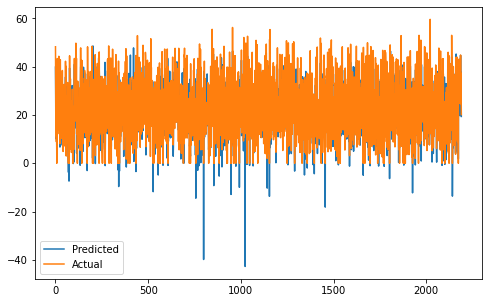

In [ ]:
#Compare between y_pred_test vs original y_test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso
 


In [ ]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -37.936072286585855


In [ ]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
# lasso score 
lasso.score(x_train, y_train)

0.7629142641092735

In [ ]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [ ]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13614730823984
RMSE : 6.0939434940143515
R2 : 0.7629142641092735
Adjusted R2 : 0.7575989370085006


In [ ]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


MSE : 37.18201422405232
RMSE : 6.097705652460794
R2 : 0.7514395926479578
Adjusted R2 : 0.7458670099516018


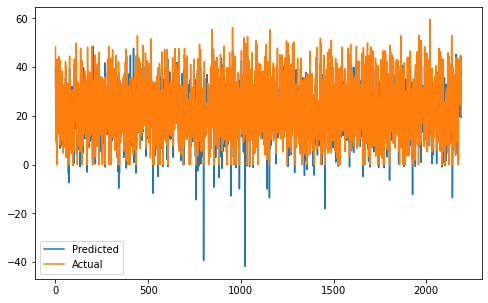

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Ridge

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -38.06587599355926


In [ ]:
ridge= Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [ ]:
ridge.score(x_train, y_train) 

0.762933381019659

In [ ]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [ ]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


MSE : 37.13315291299508
RMSE : 6.093697802893993
R2 : 0.762933381019659
Adjusted R2 : 0.7576184825091236


In [ ]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.26764694572257
RMSE : 6.104723330808905
R2 : 0.7508671410305504
Adjusted R2 : 0.7452817242951307


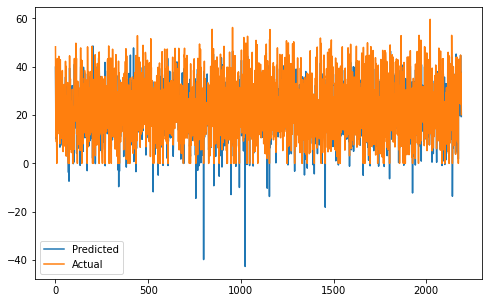

In [ ]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
test

{'Lasso regreson': (37.18201422405232,
  6.097705652460794,
  0.7514395926479578,
  0.7458670099516018),
 'Linier regreson': (37.273629840755824,
  6.1052133329438885,
  0.750827145595724,
  0.745240832185446),
 'Ridge regreson': (37.26764694572257,
  6.104723330808905,
  0.7508671410305504,
  0.7452817242951307)}

## Elastic net

In [ ]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
 
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.001)

In [ ]:
elasticnet.score(x_train, y_train)

0.7607200535243308

In [ ]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(x_train)
y_pred_test_en=elasticnet.predict(x_test)

In [ ]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['ElasticNet']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.47983954768055
RMSE : 6.122078041619573
R2 : 0.7607200535243308
Adjusted R2 : 0.7553555334725643


In [ ]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['ElasticNet']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_en))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 36.469868314473736
RMSE : 6.039028755890614
R2 : 0.756200262048822
Adjusted R2 : 0.7507344108476746


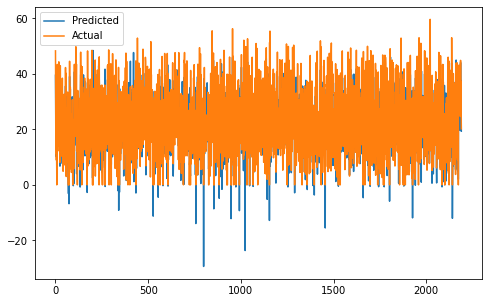

In [ ]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision tree by using decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-41.507 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-49.208 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-45.203 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-49.589 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-56.269 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-58.716 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.361 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-56.989 total time=   0.0s
[CV 3/3] END ma

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("The best fit alpha value is found out to be :" ,tuning_model.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", tuning_model.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 90, 'splitter': 'best'}

Using  {'alpha': 0.01}  the negative mean squared error is:  -36.14431058237155


In [ ]:
#importing the decision tree model for training 
decision_regressor =  DecisionTreeRegressor(criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=80,splitter='best')
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_leaf_nodes=80)

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(x_train)
y_pred_test_dt = decision_regressor.predict(x_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_dt))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.7954152088220128
MSE : 32.04533125397695
RMSE : 5.660859586138571
R2 : 0.7954152088220128
Adjusted R2 : 0.7908285343817777


In [ ]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['DecisionTreeRegressor']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_dt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 34.876743604873276
RMSE : 5.9056535290239704
R2 : 0.7668502425580741
Adjusted R2 : 0.7616231578512958


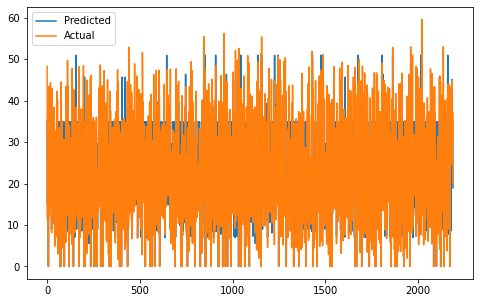

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Random forest Rergressor

In [ ]:
# Hyperparameter tuning

from sklearn.ensemble import RandomForestRegressor
# random_forest=RandomForestRegressor() # For GBM, use GradientBoostingClassifier()
# grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
# #n_estimators=no of trees
# #max_depth=How much maximum depth the d-tree is goes
# random_forest= GridSearchCV(random_forest, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# # Fit the object to train dataset
# random_forest.fit(x_train, y_train)
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
# print(rf_model.best_params_)
# rf_model.best_score_

In [ ]:
# y_pred_train_rf = random_forest.predict(x_train)
# y_pred_test_rf = random_forest.predict(x_test)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

In [ ]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


Model Score: 0.9854268860250726
MSE : 2.2826734188770867
RMSE : 1.5108518851552215
R2 : 0.9854268860250726
Adjusted R2 : 0.9851001651139112


In [ ]:
# test random forest
print("Model Score:",rf_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Random_forest']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_rf))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8936060812959069
MSE : 15.91540760956897
RMSE : 3.989411937813513
R2 : 0.8936060812959069
Adjusted R2 : 0.8912207902647082


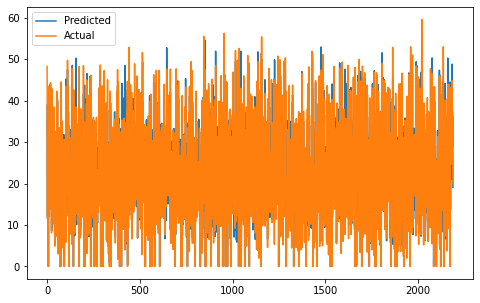

In [ ]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbd_model=GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  # 'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
gb_regression=GridSearchCV(gbd_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
gb_regression.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .learning_rate=0.01, max_depth=4;, score=-66.109 total time=   1.3s
[CV 2/5] END .learning_rate=0.01, max_depth=4;, score=-69.361 total time=   1.3s
[CV 3/5] END .learning_rate=0.01, max_depth=4;, score=-69.738 total time=   1.3s
[CV 4/5] END .learning_rate=0.01, max_depth=4;, score=-72.461 total time=   1.3s
[CV 5/5] END .learning_rate=0.01, max_depth=4;, score=-65.447 total time=   1.3s
[CV 1/5] END .learning_rate=0.01, max_depth=6;, score=-53.353 total time=   1.8s
[CV 2/5] END .learning_rate=0.01, max_depth=6;, score=-55.988 total time=   1.9s
[CV 3/5] END .learning_rate=0.01, max_depth=6;, score=-56.695 total time=   1.9s
[CV 4/5] END .learning_rate=0.01, max_depth=6;, score=-59.616 total time=   1.8s
[CV 5/5] END .learning_rate=0.01, max_depth=6;, score=-52.682 total time=   1.8s
[CV 1/5] END .learning_rate=0.01, max_depth=8;, score=-45.076 total time=   2.4s
[CV 2/5] END .learning_rate=0.01, max_depth=8;, 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gb_regression.best_params_
gb_regression.best_estimator_

GradientBoostingRegressor(learning_rate=0.04, max_depth=10)

In [ ]:
gb_optimal_model = gb_regression.best_estimator_

In [ ]:
# Making predictions on train and test data

y_pred_train_gb = gb_optimal_model.predict(x_train)
y_pred_test_gb = gb_optimal_model.predict(x_test)

In [ ]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.9686919285509537
MSE : 4.903969228265
RMSE : 2.214490737904541
R2 : 0.9686919285509537
Adjusted R2 : 0.9679900194292562


In [ ]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(x_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['GradientBoostingRegressor']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_gb))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.8927826157314216
MSE : 16.038589369117442
RMSE : 4.004820766166376
R2 : 0.8927826157314216
Adjusted R2 : 0.8903788630715002


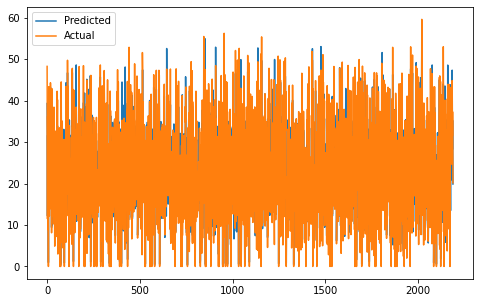

In [ ]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Xgboost Regressor

In [ ]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()
parameters = {
    'max_depth':  (4,6,8,10),
    # 'n_estimators': (100,200,500,1000,1500),
    'learning_rate': [0.1, 0.01, 0.05,0.09]
}
# 'learning_rate': [0.01,0.02,0.03,0.04],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  # 'n_estimators' : [100,500,1000, 1500],
                  # 'max_depth'    : [4,6,8,10]

In [ ]:
xg_regression=GridSearchCV(xg_model,param_grid=parameters,scoring='roc_auc',cv=5,verbose=3)
xg_regression.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[12:20:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   1.0s
[12:20:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.9s
[12:20:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.9s
[12:20:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 4/5] END ......learning_rate=0.1, max_depth=4;, score=nan total time=   0.9s
[12:20:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor o

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.09],
                         'max_depth': (4, 6, 8, 10)},
             scoring='roc_auc', verbose=3)

In [ ]:
xg_regression.best_params_
# xg_regression.best_estimator_

{'learning_rate': 0.1, 'max_depth': 4}

In [ ]:
xg_regression.best_estimator_
xg_optimal_model = xg_regression.best_estimator_
# xg_grid.best_params_
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(x_train)
y_pred_test_x_g  = xg_optimal_model.predict(x_test)

In [ ]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['XGBoost']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_x_g))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

Model Score: 0.892549996227313
MSE : 16.830532437483136
RMSE : 4.102503191648135
R2 : 0.892549996227313
Adjusted R2 : 0.8901410283706623


In [ ]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(x_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['XGBoost']=MSE,RMSE,r2,1-(1-r2_score((y_test), (y_pred_test_x_g)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


Model Score: 0.892549996227313
MSE : 19.446866450146597
RMSE : 4.4098601395221815
R2 : 0.8699984079011416
Adjusted R2 : 0.8670838462847262


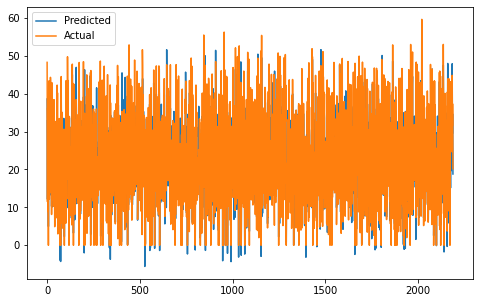

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Cheack model 

In [ ]:
Test=pd.DataFrame(test,index=["Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
Train=pd.DataFrame(train,index=["Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])

In [ ]:
Test.transpose()

,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
Linier regreson,37.273630,6.105213,0.750827,0.745241
Lasso regreson,37.182014,6.097706,0.751440,0.745867
Ridge regreson,37.267647,6.104723,0.750867,0.745282
DecisionTreeRegressor,34.876744,5.905654,0.766850,0.761623
Random_forest,15.915408,3.989412,0.893606,0.891221
GradientBoostingRegressor,16.038589,4.004821,0.892783,0.890379
XGBoost,19.446866,4.409860,0.869998,0.867084


In [ ]:
Train.transpose()

,Train MSE,Train RMSE,Train R^2,Train Adjusted R^2
Linier regreson,37.133147,6.093697,0.762933,0.757619
Lasso regreson,37.136147,6.093943,0.762914,0.757599
Ridge regreson,37.133153,6.093698,0.762933,0.757618
ElasticNet,36.469868,6.039029,0.756200,0.750734
DecisionTreeRegressor,32.045331,5.660860,0.795415,0.790829
Random_forest,2.282673,1.510852,0.985427,0.985100
GradientBoostingRegressor,4.903969,2.214491,0.968692,0.967990
XGBoost,16.830532,4.102503,0.892550,0.890141


# Conclusion


 . 	Bike rental count is mostly correlated with the time of the day as it is peak at 10  am morning and 8 pm at evening.

. ‘Hour’ of the day holds the most important feature.

.	We observed that bike rental count is high during working days than non  working day.

. The Rented bike Count has been increased from 2017-2018. No Overfitting is seen.

. When we compare the root mean squared error and mean absolute error of all the models, Random_forest  and Gradient Boosting gives the highest R2 score ending with the accuracy of 89% . 
. So, finally this two model are best for predicting the bike rental count on daily basis
